In [1]:
import numpy
import matplotlib.pyplot as plt

from collections import Counter
from sklearn import datasets
from sklearn import metrics

from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

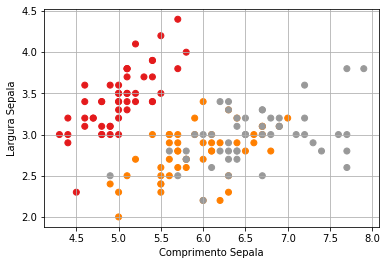

In [2]:
iris = datasets.load_iris()

#print (iris.DESCR)

X = iris.data  # quatro caracteristicas analisadas juntas
y = iris.target #classificacao

#0 Comprimento da sépala; 1 Largura da sépala; 
#2 comprimento da pétala; 3 Largura da pétala 
#setosa, versicolor, virginica

plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1)
plt.xlabel('Comprimento Sepala')
plt.ylabel('Largura Sepala')
plt.grid(True)
plt.show()

In [3]:
clf = MLPClassifier(alpha = 0.01, max_iter = 2000)

#dados de treinamento 'até 40' de cada classe
yt = numpy.concatenate([y[:40], y[51:90], y[101:140]])
xt = numpy.concatenate([X[:40,:], X[51:90,:], X[101:140,:]])
clf.fit(xt, yt)

#validacão com o restante dos dados
yv = numpy.concatenate([y[40:50], y[90:100], y[140:150]])
xv = numpy.concatenate([X[40:50,:], X[90:100,:], X[140:150,:]])
yp = clf.predict(xv)
print(yp)
print(yv)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [4]:
comp = yp == yv
c = Counter(comp)
print(c)
#taxa de acerto
print(c[1] / (c[0] + c[1]))

Counter({True: 30})
1.0


Matriz de confusão, sem normalizar
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Matriz de confusão normalizada
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


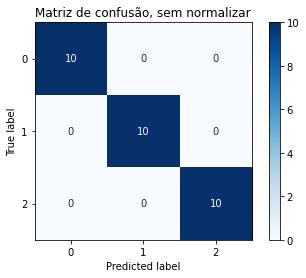

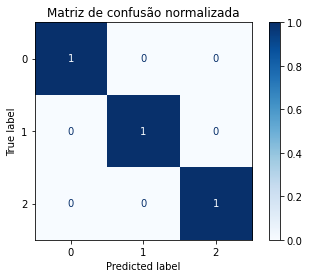

In [5]:
titles_options = [("Matriz de confusão, sem normalizar", None),
                  ("Matriz de confusão normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, xv, yv, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [6]:
print(classification_report(yv, yp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:
#mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt = DecisionTreeClassifier()
mod_dt.fit(xt, yt)
prediction = mod_dt.predict(xv)
print('The accuracy of the Decision Tree is',"{:.1f}".format(metrics.accuracy_score(prediction, yp)))


The accuracy of the Decision Tree is 1.0


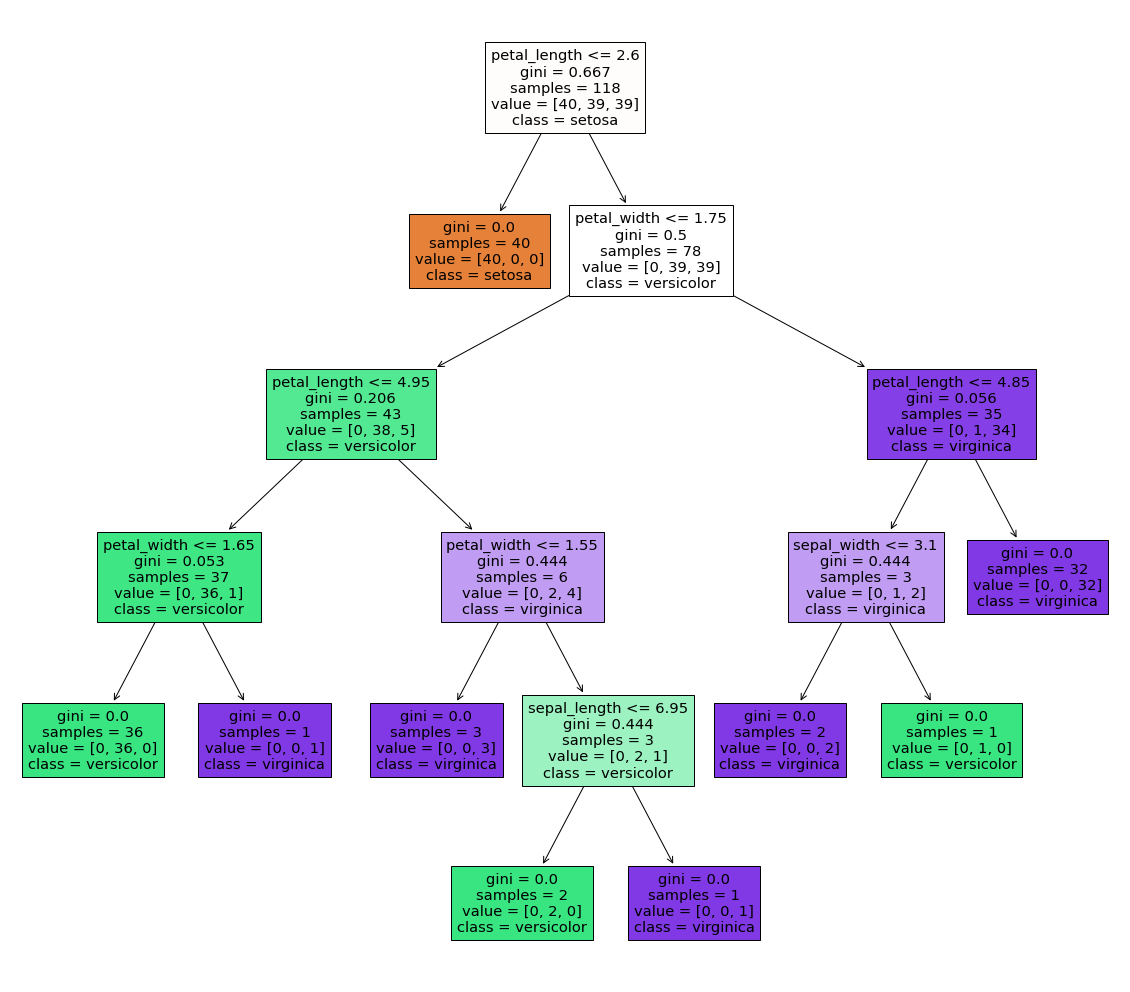

In [8]:
plt.figure(figsize = (20,18))
plot_tree(mod_dt, feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"],
          class_names = ['setosa', 'versicolor', 'virginica'], filled = True);

In [9]:
# Guassian Naive Bayes Classifier
mod_gnb_all = GaussianNB()
y_pred = mod_gnb_all.fit(xt, yt).predict(xv)
print('The accuracy of the Guassian Naive Bayes Classifier on test data is',
      "{:.1f}".format(metrics.accuracy_score(prediction,yp)))

The accuracy of the Guassian Naive Bayes Classifier on test data is 1.0


Referência
[Árvore de decisão](https://scikit-learn.org/stable/modules/tree.html)